### №1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from polinomial_regression import polynomial_regression, linear_regression

In [2]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
dots = np.linspace(-10, 10, 100)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [3]:
class New_LGR_(polynomial_regression):
    @staticmethod
    def mserror(X, w, c0, y_real,l_2= 1e-8):
        y = X.dot(w.T) + c0
        Reg = l_2*np.sum(w**2)
        return np.sum((y - y_real)**2)/ y_real.shape[0] + Reg
    @staticmethod
    def mserror_grad(X, w, c0, y_real,l_2 = 0.01):
        delta=(X.dot(w.T)+c0-y_real)
        dReg = l_2 * 2 * np.sum(w)
        return 2*delta.T.dot(X)/y_real.shape[0] + dReg , np.sum(2*delta)/y_real.shape[0]

In [4]:
model = New_LGR_(max_power = 5, eta = 0.01)
model.fit(x_data, f_data)
model.predict(x_data)

array([ 1.62831933e+02, -1.19095222e-02, -2.39493328e-01,  2.37370494e+03,
        2.86722530e+00,  1.63517632e+02, -6.59354812e+01,  4.73531738e+02,
        1.76410536e+03, -3.44891614e+03])

In [5]:
np.sum(model.w**2)

0.020792586423065383

In [6]:
model_2 = polynomial_regression(5, eta = 0.01)
model_2.fit(x_data, f_data)
model_2.predict(x_data)

array([ 1.62831934e+02, -1.19095294e-02, -2.39493356e-01,  2.37370493e+03,
        2.86722543e+00,  1.63517633e+02, -6.59354818e+01,  4.73531739e+02,
        1.76410536e+03, -3.44891614e+03])

In [7]:
np.sum(model_2.w**2)

0.020792587509063216

In [8]:
model.test(x_data,f_data)

182114.48920294503

In [9]:
model_2.test(x_data,f_data)

182114.4889877654

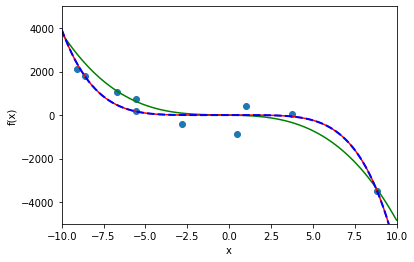

In [10]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='green')
plt.scatter(x_data, f_data)

#C L2
plt.plot(dots, model.predict(dots), color='red')
#Без L2
plt.plot(dots, model_2.predict(dots), 'm--', linewidth=2, color = 'blue')
plt.show()

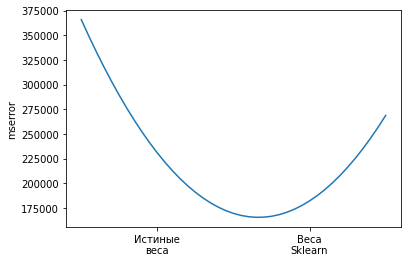

In [11]:
w_true=np.array([[- 13.2,  - 5.3,  - 4.17, 0, 0]])
c_true=0.6

#Веса и интерсепт нашей модели
w_our = model.w
c_our = model.c

x=New_LGR_.generate_features(x_data, 5)
y=f_data[:, np.newaxis]

x_dots=np.arange(-0.5, 1.55, 0.05)
mserror_values=np.array([linear_regression.mserror(x, w_true+(w_our -w_true)*i, 
                                                   c_true+(c_our-c_true), y) for i in x_dots])

plt.ylabel('mserror')
plt.xticks([0, 1], ['Истиные\nвеса', 'Веса\nSklearn'])
plt.plot(x_dots, mserror_values)
plt.show()

R_2

In [12]:
def r_2(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total
print(r_2(model.predict(x_data), f_data))

0.9190448927130425


Модель описывает примерно 92% изменчивости

### №2

In [13]:
from sklearn import datasets
import numpy as np
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [14]:
data

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

Стандартизируем данные

In [15]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]
data

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [16]:
from sklearn.utils import shuffle
def mserr(X,w,y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2))/y.shape[0]


def grad_2(X, w, y_real,l_2):
        delta=(X.dot(w.T)-y_real)
        Reg = l_2*2*np.sum(w)
        return 2*delta.T.dot(X)/y_real.shape[0] + Reg
    
def grad(X, w, y_real):
        delta=(X.dot(w.T)-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0]

In [17]:
# инициализируем начальный вектор весов
w = np.zeros(2)
w_2 = np.zeros(2)

# список векторов весов после каждой итерации
w_list = []
w_list_2 = []

# список значений ошибок после каждой итерации
errors = []
errors_2 = []

# шаг градиентного спуска
eta = 0.01

# размер пакета(вычитал что наиболее лучше подходят значения, кратные архитектуре)
batch_size = 50

# кол-во пакетов
n_batches = int(data.shape[0]/batch_size)

# счетчик итераций
iter_num_1 = 0
iter_num_2 = 0

# число итераций
iters_num = 10

# Спуск_1
for i  in range(iters_num):
    tmp_X, tmp_Y = shuffle(data, target)
    for j in range(n_batches):
        x = tmp_X[j*batch_size:(j*batch_size + batch_size),:]
        y = tmp_Y[j*batch_size:(j*batch_size + batch_size)]
        new_w = w - eta*grad(x,w,y)
        error=mserr(data, new_w, target)
        errors.append(error)
        w = new_w
        if j%5==0:
            print(f'Итерация {i}:{j} пакеты [{j*batch_size}:{(j*batch_size + batch_size)}] Веса {w} MSE {error}')
    iter_num_1 +=1
        

print(f'В случае использования пакетного градиентного спуска функционал ошибки составляет {errors[-1]}')

# Спуск_2
iters_num_2 = 10
# коэф L2 регуляризации
l_2 = 0.01
for i  in range(iters_num_2):
    tmp_X, tmp_Y = shuffle(data, target)
    for j in range(n_batches):
        x = tmp_X[j*batch_size:(j*batch_size + batch_size),:]
        y = tmp_Y[j*batch_size:(j*batch_size + batch_size)]
        new_w = w_2 - eta*grad_2(x,w_2,y,l_2)
        error_2=mserr(data, new_w, target)
        errors_2.append(error_2)
        w_2 = new_w
        if j%5==0:
            print(f'Итерация {i}:{j} пакеты [{j*batch_size}:{(j*batch_size + batch_size)}] Веса {w_2} MSE {error_2}')
    iter_num_2 +=1
        

print(f'В случае использования пакетного градиентного спуска функционал ошибки составляет {errors_2[-1]}')

Итерация 0:0 пакеты [0:50] Веса [0.93939107 1.24655419] MSE 7915.745098052656
Итерация 0:5 пакеты [250:300] Веса [6.05289743 6.49365727] MSE 6684.161892137544
Итерация 0:10 пакеты [500:550] Веса [11.40630581 12.22397929] MSE 5481.286023045991
Итерация 0:15 пакеты [750:800] Веса [16.62025973 18.17361187] MSE 4389.300669187051
Итерация 1:0 пакеты [0:50] Веса [21.29180951 23.09080277] MSE 3550.5710229357924
Итерация 1:5 пакеты [250:300] Веса [24.57458913 26.48461737] MSE 3019.854443684146
Итерация 1:10 пакеты [500:550] Веса [27.80404658 30.84100541] MSE 2465.882121225577
Итерация 1:15 пакеты [750:800] Веса [30.49266694 34.31018439] MSE 2058.767669284844
Итерация 2:0 пакеты [0:50] Веса [33.90843888 37.59827358] MSE 1660.3834520961218
Итерация 2:5 пакеты [250:300] Веса [36.71407705 40.8352651 ] MSE 1337.5559986656706
Итерация 2:10 пакеты [500:550] Веса [39.06346073 43.5618694 ] MSE 1094.0294347383008
Итерация 2:15 пакеты [750:800] Веса [40.9038709  45.45949375] MSE 931.2147416283984
Итераци

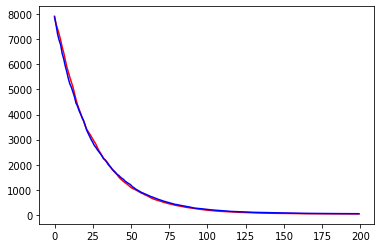

In [18]:
plt.plot(range(len(errors)), errors, color = 'red')
plt.plot(range(len(errors_2)), errors_2, color = 'blue')
plt.show()